In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

### Importing Data

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam/spamraw.csv')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


### Data Analysis

In [3]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


### Extract SPAM Messages

In [4]:
spam_message  = df[df['type'] == 'spam']
spam_message.head()

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


### Describe Spam

In [5]:
spam_message.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


### Extract HAM Message

In [6]:
ham_message = df[df['type'] == 'ham']
ham_message.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy


In [7]:
ham_message.describe()

,type,text
count,4812,4812
unique,1,4503
top,ham,"Sorry, I'll call later"
freq,4812,30


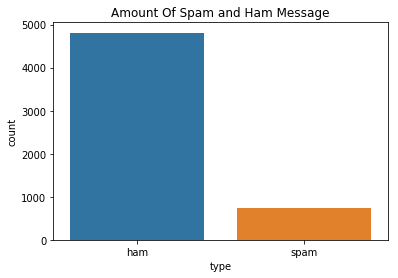

In [8]:
sns.countplot(data=df, x=df['type']).set_title("Amount Of Spam and Ham Message")
plt.show()

### Splitting the test and train data

In [9]:
data_train, data_test, labels_train, labels_test = train_test_split(df.text, df.type, test_size=0.2, random_state=0)
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (4447,) (4447,)
data_test, labels_test:  (1112,) (1112,)


### Extraction & CountVectorize

In [10]:
vectorizer = CountVectorizer()
#fit & transform
# fit: build dict (i.e. word->wordID)  
# transform: convert document (i.e. each line in the file) to word vector 
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

In [11]:
data_train_count

<4447x7764 sparse matrix of type '<class 'numpy.int64'>'
	with 58770 stored elements in Compressed Sparse Row format>

In [12]:
data_test_count

<1112x7764 sparse matrix of type '<class 'numpy.int64'>'
	with 13560 stored elements in Compressed Sparse Row format>

In [13]:
data_train

1826                                            Yup ok...
3724                        See? I thought it all through
624     Your account has been refilled successfully by...
2250    FREE camera phones with linerental from 4.49/m...
500     How come it takes so little time for a child w...
                              ...                        
4931                             I'm at home. Please call
3264                               Morning only i can ok.
1653             Tee hee. Off to lecture, cheery bye bye.
2607    FREE MESSAGE Activate your 500 FREE Text Messa...
2732    Forgot you were working today! Wanna chat, but...
Name: text, Length: 4447, dtype: object

In [14]:
data_test

1965                 How are you. Just checking up on you
3519                                                  Yup
247                          At what time are you coming.
1411    Come to medical college at 7pm ......forward i...
1034    Neither [in sterm voice] - i'm studying. All f...
                              ...                        
3368                     Yar but they say got some error.
3081    Erm... Woodland avenue somewhere. Do you get t...
1012    Ya but it cant display internal subs so i gott...
4340                        Like a personal sized or what
4123    I don't want you to leave. But i'm barely doin...
Name: text, Length: 1112, dtype: object

In [15]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [16]:
# for i in range(len(predictions)):
#     print(predictions[i], data_test_count[i])

In [17]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9901079136690647


In [18]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[979   0]
 [ 11 122]]


In [19]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       979
        spam       1.00      0.92      0.96       133

    accuracy                           0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

